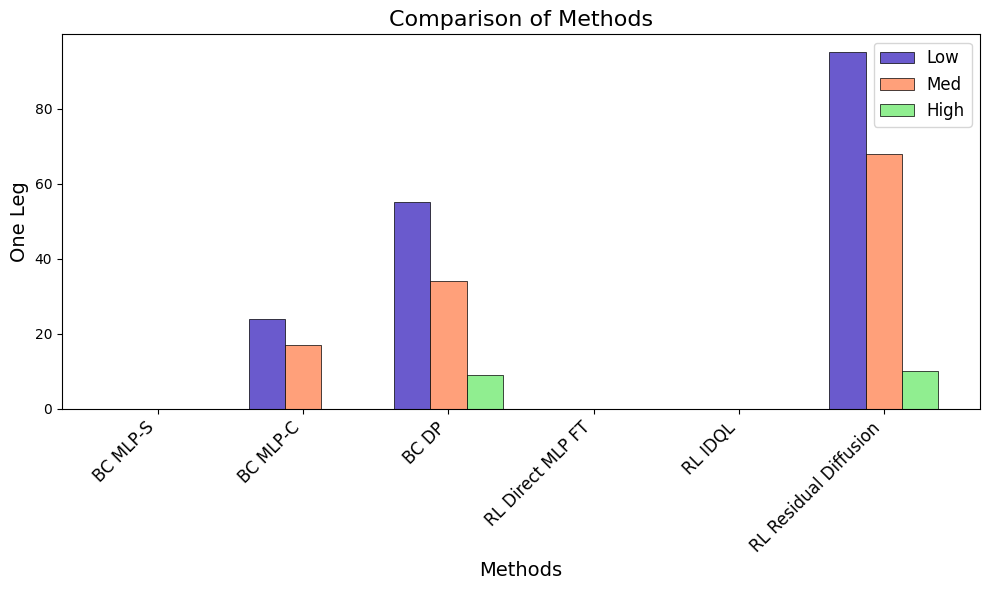

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
methods = [
    "BC MLP-S",
    "BC MLP-C",
    "BC DP",
    "RL Direct MLP FT",
    "RL IDQL",
    "RL Residual Diffusion",
]
low_values = [0, 24, 55, np.nan, np.nan, 95]
med_values = [0, 17, 34, np.nan, np.nan, 68]
high_values = [0, np.nan, 9, np.nan, np.nan, 10]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(methods))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    r1,
    low_values,
    bar_width,
    label="Low",
    color="#6A5ACD",
    edgecolor="black",
    linewidth=0.5,
)
ax.bar(
    r2,
    med_values,
    bar_width,
    label="Med",
    color="#FFA07A",
    edgecolor="black",
    linewidth=0.5,
)
ax.bar(
    r3,
    high_values,
    bar_width,
    label="High",
    color="#90EE90",
    edgecolor="black",
    linewidth=0.5,
)

# Add labels and title
ax.set_xlabel("Methods", fontsize=14)
ax.set_ylabel("One Leg", fontsize=14)
ax.set_title("Comparison of Methods", fontsize=16)
ax.set_xticks([r + bar_width for r in range(len(methods))])
ax.set_xticklabels(methods, fontsize=12, rotation=45, ha="right")
ax.legend(fontsize=12)

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

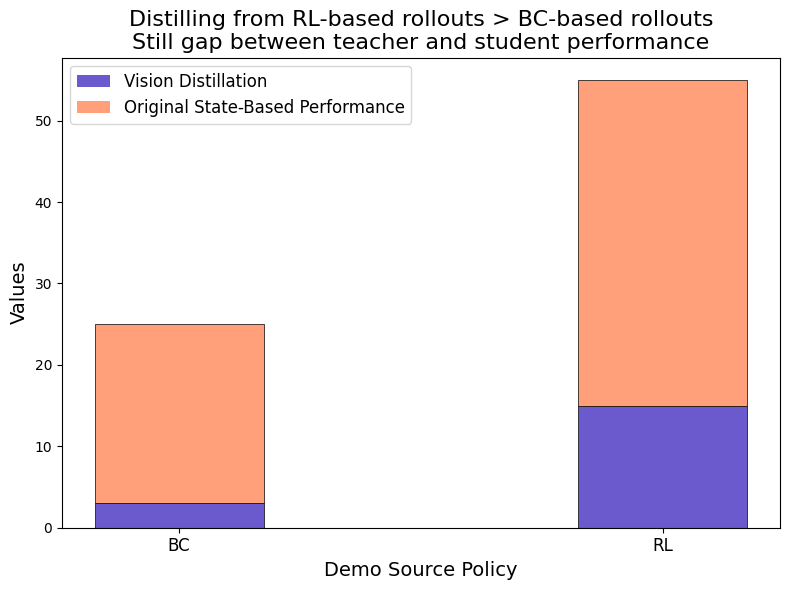

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ["BC", "RL"]
vision = [3, 15]
total = [25, 55]

# Calculate the state values
state = np.array(total) - np.array(vision)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = np.arange(len(labels))

# Define custom colors
vision_color = "#6A5ACD"  # SlateBlue
state_color = "#FFA07A"  # LightSalmon

# Create the bars
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(r, vision, bar_width, label="Vision Distillation", color=vision_color)
ax.bar(
    r,
    state,
    bar_width,
    bottom=vision,
    label="Original State-Based Performance",
    color=state_color,
)

# Add labels and title
ax.set_xlabel("Demo Source Policy", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.set_title(
    "Distilling from RL-based rollouts > BC-based rollouts\nStill gap between teacher and student performance",
    fontsize=16,
)
ax.set_xticks(r)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# Customize bar edges
for patch in ax.patches:
    patch.set_edgecolor("black")
    patch.set_linewidth(0.5)

# Show the graph
plt.tight_layout()
plt.show()

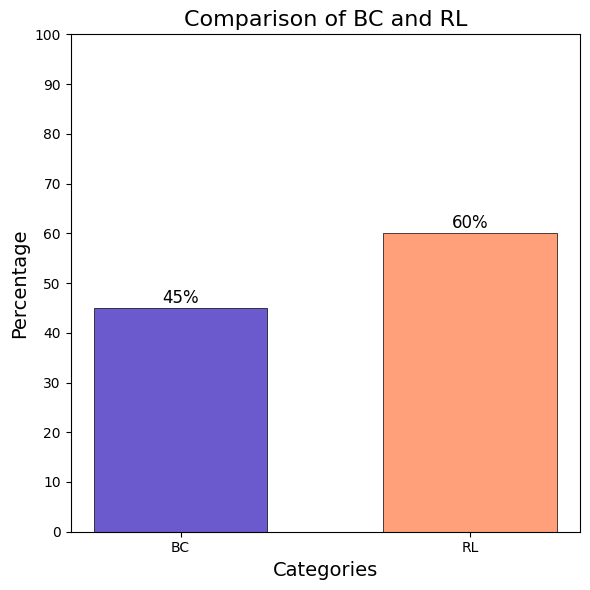

In [13]:
import matplotlib.pyplot as plt

# Data
labels = ["BC", "RL"]
heights = [45, 60]

# Create the bars
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(
    labels,
    heights,
    width=0.6,
    color=["#6A5ACD", "#FFA07A"],
    edgecolor="black",
    linewidth=0.5,
)

# Add labels and title
ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_title("Comparison of BC and RL", fontsize=16)
ax.set_ylim(0, 100)  # Set y-axis limits from 0 to 100
ax.set_yticks(range(0, 101, 10))  # Set y-axis ticks from 0 to 100 with a step of 10
# ax.grid(axis='y', linestyle='--', linewidth=0.5)  # Add horizontal grid lines

# Add percentage signs to the top of each bar
for i, v in enumerate(heights):
    ax.text(i, v + 1, f"{v}%", fontsize=12, ha="center")

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

# Analyze Distillation Scaling

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("/data/scratch/ankile/robust-rearrangement/notebooks/data/scaling_low_1.csv")


df = df[["Name", "best_success_rate", "success_rate"]]

df.head()

,Name,best_success_rate,success_rate
0,state-rl-10050-19,0.742188,0.742188
1,state-rl-1050-17,0.703125,0.648438
2,rl-1050-7,0.640625,0.609375
3,rl-1050-15,0.656250,0.625000
4,bc-1050-8,0.226562,0.140625


In [14]:
df = df.assign(group_name=df.Name.str.split("-").str[:-1].str.join("-"))

df.head()

,Name,best_success_rate,success_rate,group_name
0,state-rl-10050-19,0.742188,0.742188,state-rl-10050
1,state-rl-1050-17,0.703125,0.648438,state-rl-1050
2,rl-1050-7,0.640625,0.609375,rl-1050
3,rl-1050-15,0.656250,0.625000,rl-1050
4,bc-1050-8,0.226562,0.140625,bc-1050


In [16]:
df = df.groupby("group_name").mean().reset_index()

df

,group_name,best_success_rate,success_rate
0,bc-1050,0.273438,0.156250
1,human-50,0.496094,0.339844
2,rl-1050,0.648438,0.617188
3,rl-300,0.691406,0.589844
4,rl-550,0.644531,0.542969
5,state-rl-10050,0.742188,0.742188
6,state-rl-1050,0.703125,0.648438
